# **Exploratory Data Analysis on Online Course Enrollment Data**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [2]:
# also set a random state
rs = 123

***
## Load and Explore the dataset

First, let's load the datasets as `Pandas` dataframes and start some basic exploratory data analysis tasks on them.


In [3]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"

In [4]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

In [5]:
# let's check the columns, i.e. FEATURES
course_df.columns


Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

We can see from the above cell output that the columns represent some metadata about a course such as its id, title, and genres. We can see that the course genres are some popular topics related to machine learning, databases, app developments, etc.

In [6]:
#let's check how many unique courses we have in this dataset:
course_df.shape[0]
# tuljdonképpen a sorok számát kérdezzük le ezzel. A shape[1] pedig az oszlop száma lenne

307

In [7]:
# nézzük meg df első pár sorát, és kérdezzük le az oszlopok adattípusát is!
display(course_df.head(3))
course_df.dtypes

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0


COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

As we can see, the COURSE_ID and TITLE are str datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.
>magyarul: minden olyan tag, ahol 1-es áll, azt jelenti, hogy az adott kurzus típushoz tartozik.

For example, the following course `accelerating deep learning with gpu` is associated with genres `Python`, `MachineLearning`, and `DataScience`


In [8]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

***
## Plot a Word Cloud from Course Titles


In [9]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

#### We also want to filter common stop words and some less meaningful words:

In [10]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", 
                  "university", "end", "introduction", "basic"])

In [11]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [12]:
wordcloud.generate(titles)

We can use `plt.imshow()` method to visualize the generated wordcloud:


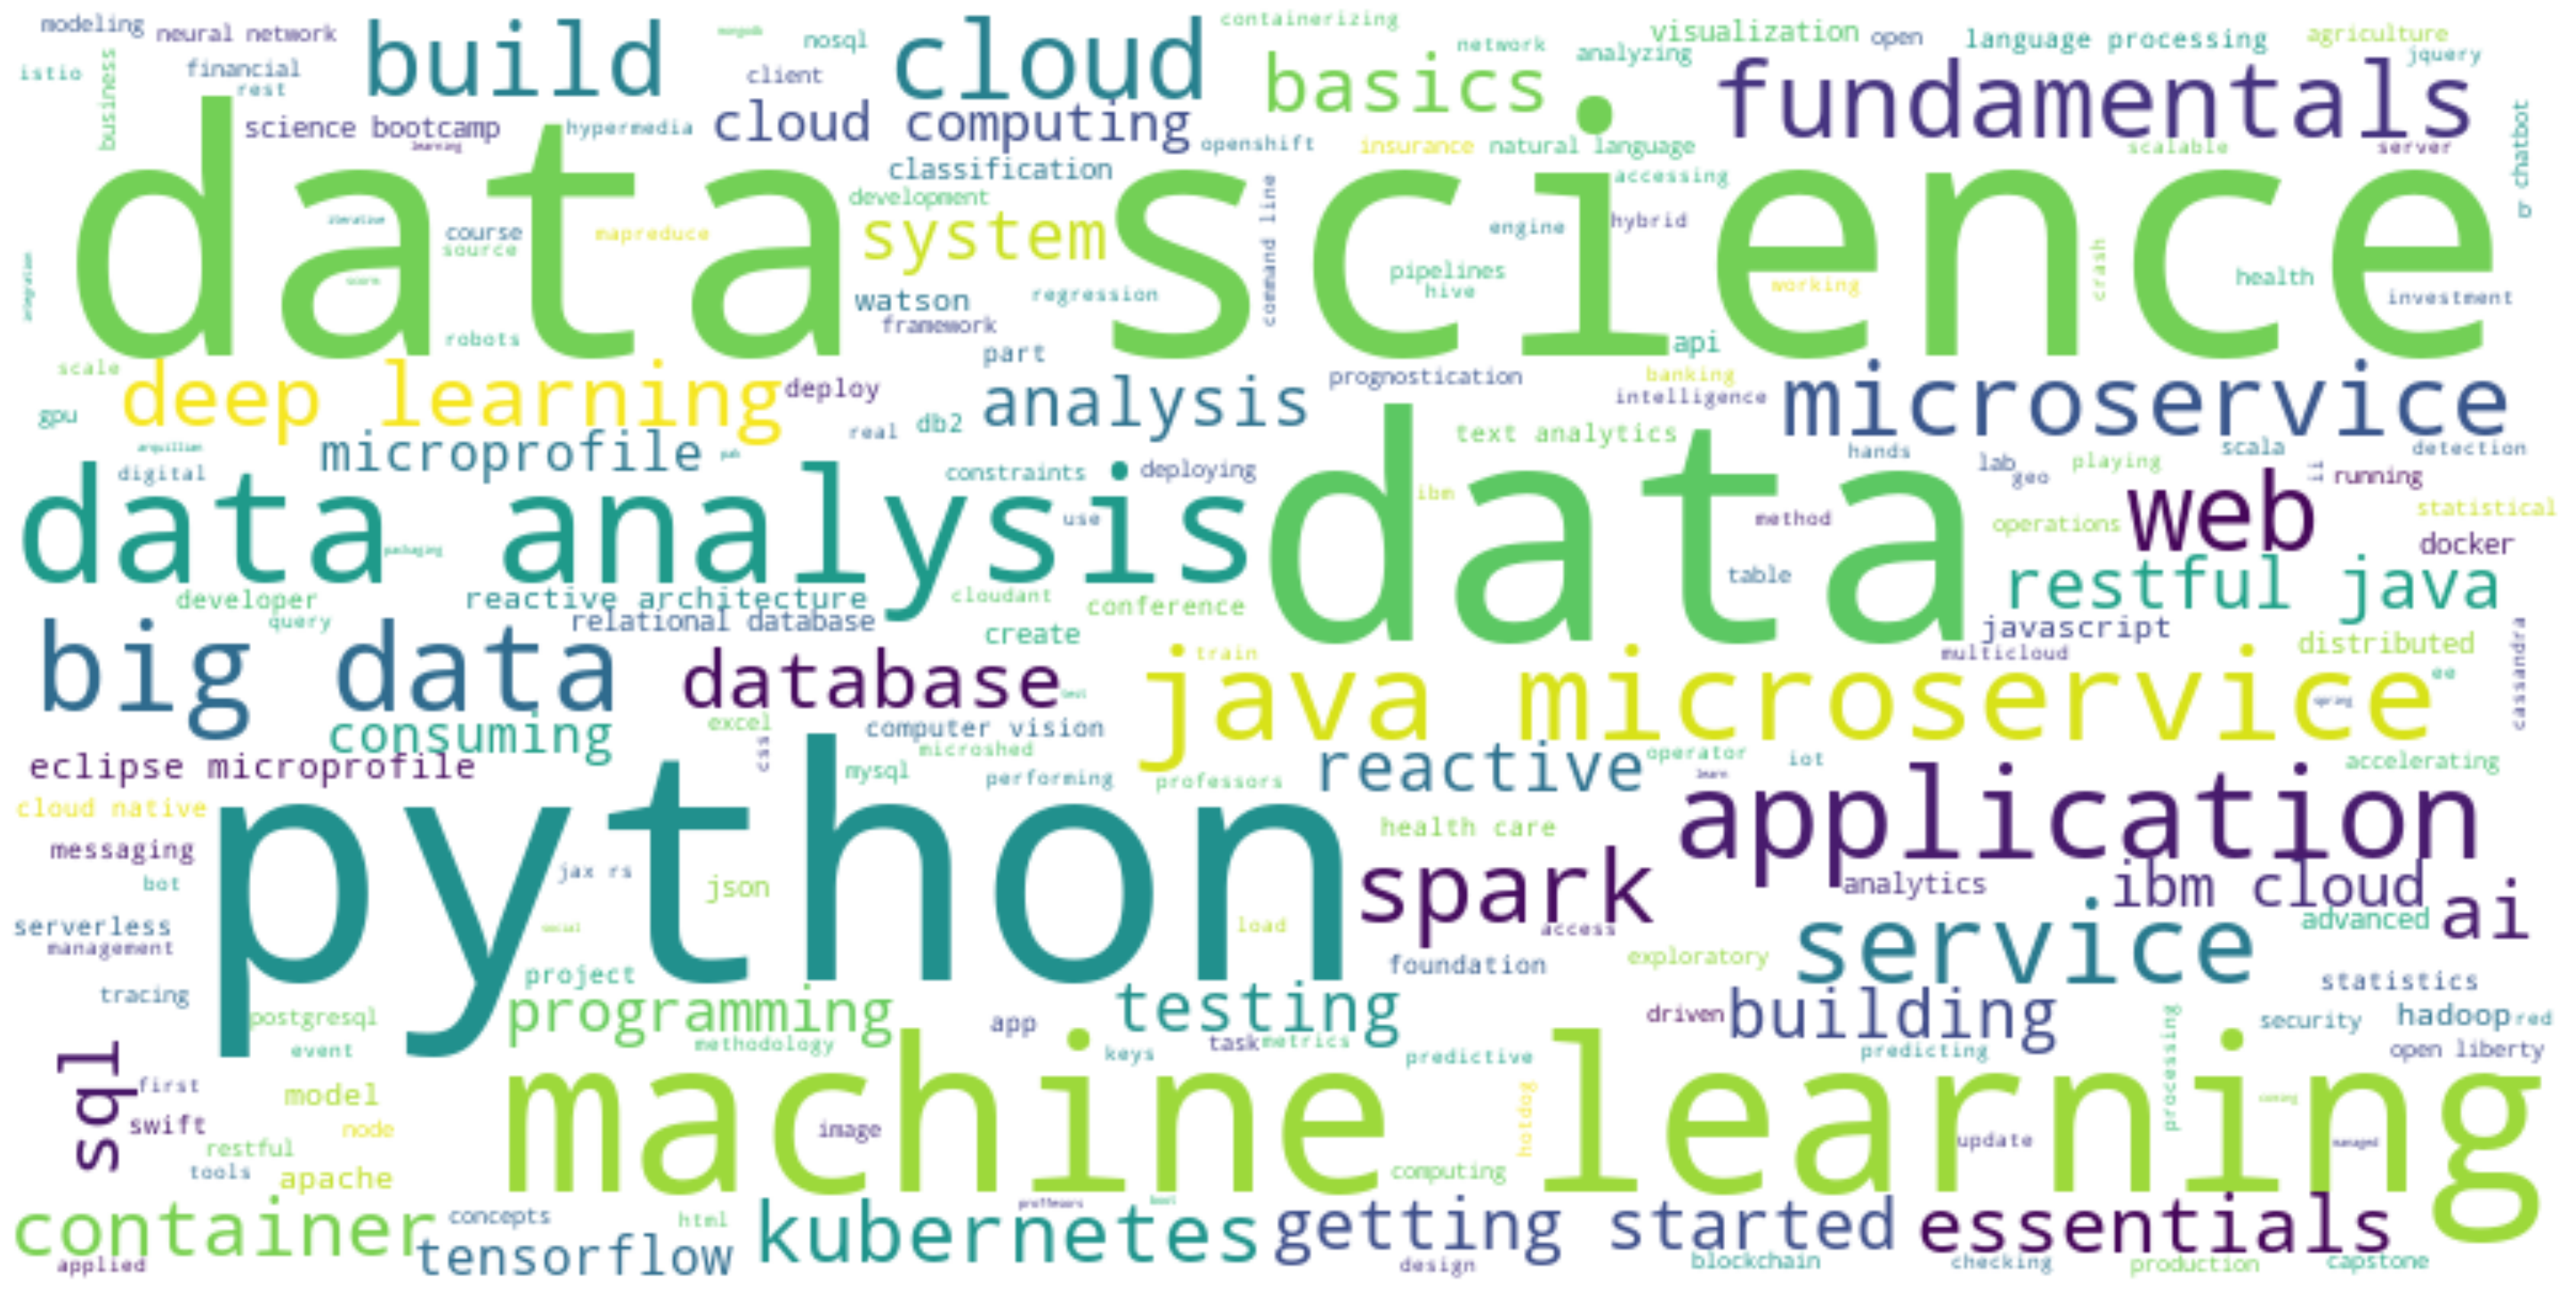

In [19]:
plt.figure(figsize=(40,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

### TASK: Analyze Course Genres
→ First, you can try to find out which courses may be of interest you. For example, what are the all machine learning related courses?

<em>TODO: Find all courses with genre MachineLearning == 1</em>

In [22]:
myinterest = course_df[course_df['MachineLearning'] == 1]
myinterest = myinterest['TITLE'].tolist()
print(myinterest)

['accelerating deep learning with gpu', 'data   ai essentials', 'ybrid cloud conference  ai pipelines lab', 'data   ai  jumpstart your journey', 'ai for everyone  master the basics', 'predicting customer satisfaction', 'predicting financial performance of a company', 'data science in insurance  basic statistical analysis ', 'text analytics 101', 'how to build watson ai and swift apis and make money', 'insurance risk assessment with montecarlo method using apache spark ', 'build swift mobile apps with watson ai services', 'text analysis', 'introduction to machine learning with sound', 'accelerating deep learning with gpu', 'text analytics 101', 'text analytics at scale', 'machine learning with apache systemml', 'action classification task based on internet firewall logs', 'data science in health care  advanced prognostication using neural networks', 'advanced machine   deep learning for spam classification task', 'data science in health care  advanced machine learning classification', '

→ Similarly, you can try to find out what are the scalable machine learning courses?

<em>TODO: Find all courses with genres MachineLearning == 1 and BigData == 1</em>

In [25]:
display(course_df.loc[(course_df['MachineLearning']==1) & (course_df['BigData'] == 1)])

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
46,GPXX0BUBEN,insurance risk assessment with montecarlo meth...,0,0,0,0,0,1,0,0,1,0,0,0,0,0
59,TA0106EN,text analytics at scale,0,0,0,0,0,1,0,1,1,0,0,0,0,0
184,BD0221EN,spark mllib,0,0,0,0,0,1,0,0,1,0,0,0,0,0
282,excourse69,machine learning with big data,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [26]:
# lets get all the GENRES:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

→ Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the MachineLearning genre and 23 courses that belong to the Python genre. We also want to sort the genre count list to find the most popular course genres.

<em>TODO: Use the Pandas dataframe sum() and sort_values() methods to genreate a sorted course count per genre. You may also implement the task with different solutions</em>

In [147]:
a = course_df[genres].sum(axis=0, skipna=True).sort_values(ascending=False)
b = a.to_frame()
#b.rename(columns = {'0':'inCourses'}, inplace = True)
b.columns = ['#inCourses']
b

,#inCourses
BackendDev,78
MachineLearning,69
Database,60
DataAnalysis,56
DataScience,38
CloudComputing,37
BigData,36
Python,28
FrontendDev,19
Containers,17


In [53]:
#top3:
course_df[course_df[genres].sum(axis=0, skipna=True).sort_values(ascending=False)[:3].index]

,BackendDev,MachineLearning,Database
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
302,1,0,0
303,1,0,0
304,0,0,0
305,1,0,0


→ We can also vsiaulize course genre counts using a bar chart:

<em>TODO: Use seaborn barplot or other plot methods to plot course genre counts using a barchart. The x-axis is the course genre and the y-axis is the course count per genre.</em>

>Hint: You can use sns.barplot(x=genre_sums.index, y="Count", data=genre_sums) to create your plot. you can rotate your labels by using plot.set_xticklabels(plot.get_xticklabels(),rotation = 90) method.

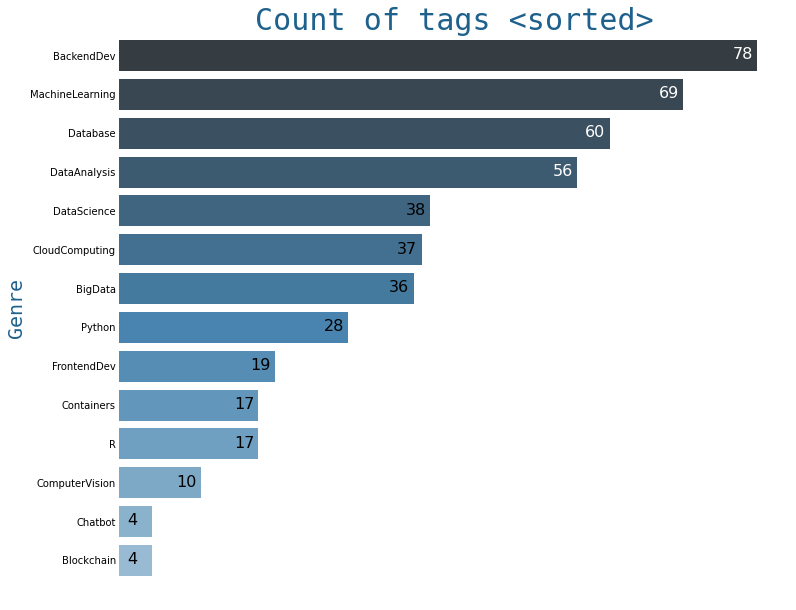

In [173]:
fig, ax = plt.subplots(figsize=(12, 10))

font = font = {'family': 'monospace',
        'color':  '#1F618D',
        'weight': 'normal',
        'size': 16,
        }

palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()

sns.barplot(y=b.index, x='#inCourses', data=b, orient="h", 
           palette=palette)

plt.xlabel(' ', fontdict=font, fontsize=20)
plt.ylabel('Genre', fontdict=font, fontsize=20)

plt.title('Count of tags <sorted>', fontdict=font, fontsize=30)

# annotate value labels to each country
for index, value in enumerate(a): 
    # muszáj 'a'-t venni annotation-höz, mert a SERIES és nem DF!!!
    if value < 50:
        plt.annotate(value, xy=(value-3, index + 0.1), 
                 color='black', size=16)
    else:
        plt.annotate(value, xy=(value-3, index + 0.1), 
                 color='white', size=16)

ax.set_xticks([])
ax.tick_params(axis='both', which='both', length=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
        
plt.show()

***
## TASK Analyze Course Enrollments


In [174]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


This dataset contains three colums, `user` representing a unique user id, `item` representing a course id, and `rating` representing a course enrollment mode.

In an online learning scenario, we have learners or students as users who enrolled courses. In fact, to follow the standard recommender system naming convention, we call each learner as a `user`, each course an `item`, and the enrollment mode or interaction as `rating`. So that's why we have columns named `user`, `item`, and `rating` instead of using `learner`, `course`, and `enrollment`.

In this project, we may use these terms interchangeably.

In [175]:
ratings_df['rating'].unique()

array([3., 2.])

The rating column contains one of two values: `2` means the <font color=yellow>user just audited the course without completing it</font> and `3` means the user <font color=lime>completed</font> the course and earned a certificate.
Two other possible values are not explicitly available in this project: `0` or `NA` means the user has no interaction with the course and `1` means the user just browsed the course.

In [176]:
#Let's see how many ratings/enrollment we have in the dataset:
ratings_df.shape[0]

233306

_TODO: Apply Pandas' groupby() and size() method on the user column to aggregate the rating count for each user, then report the total number of users after aggregation._


In [180]:
print('The distribution of ratings:\n',ratings_df.groupby('rating').size())
print()
print('The distribution of ratings of each user:\n', ratings_df.groupby('user').size())

The distribution of ratings:
 rating
2.0     10976
3.0    222330
dtype: int64

The distribution of ratings of each user:
 user
2          61
4          44
5          59
7           1
8           3
           ..
2102054     8
2102356     1
2102680    11
2102983     1
2103039     1
Length: 33901, dtype: int64


In [184]:
ratingcount_df = ratings_df.groupby('user').size().to_frame()
ratingcount_df.reset_index(level=0, inplace=True)
ratingcount_df.columns = ['user', 'count']
ratingcount_df.head()

,user,count
0,2,61
1,4,44
2,5,59
3,7,1
4,8,3


In [185]:
ratingcount_df.describe()

,user,count
count,3.390100e+04,33901.000000
mean,1.064064e+06,6.881980
std,4.972578e+05,5.823548
min,2.000000e+00,1.000000
25%,6.813480e+05,2.000000
50%,1.043907e+06,6.000000
75%,1.451159e+06,9.000000
max,2.103039e+06,61.000000


We can also get a histogram showing the enrollment distributions, e.g., how many users rated just 1 item or how many rated 10 items, etc.

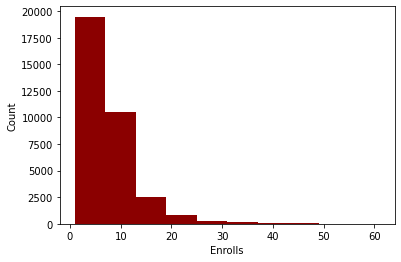

In [186]:
ratingcount_df['count'].hist(color='darkred', histtype ='bar', grid=False)

plt.xlabel('Enrolls')
plt.ylabel('Count')

plt.show()

***
### Task: Find the Top-20 Most Popular Courses

Now we know how many items each user rated. Let's see the most popular 20 courses, i.e., items with the most rating counts.

_TODO: Use Pandas groupby() and size() methods on the item column to aggregate the rating count for each item, then use the sort_values() method to sort the course enrollment count, and use the slice method to get the top 20 courses. You may also implement this task with different solutions_

In [198]:
ratingcount = ratings_df.groupby('item').size().sort_values(ascending=False)
ratingcount = ratingcount[:20]
r_df = ratingcount.to_frame()
r_df.reset_index(inplace=True)
r_df.columns = ['course', 'Ratings']
r_df

,course,Ratings
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
5,DS0103EN,7719
6,ML0101ENv3,7644
7,BD0211EN,7551
8,DS0105EN,7199
9,BC0101EN,6719


Now you may only see the item IDs which do not indicate what kind of courses they are. To make it more clear, we need to join the course titles in the course metadata dataset (`course_df`) so that we can identify what the most popular courses are immediately:

_TODO: Use Pandas merge() method to join the course_df (contains the course title column)._

Magyarul: ezt az előző df-et alakítsuk át úgy, hogy course oszlop helyett az előző df-ből (course_df) legyen benne helyette a TITLE oszlop.

In [206]:
combined_df = r_df.merge(course_df[['COURSE_ID', 'TITLE']], 
                         how='left', left_on='course', right_on='COURSE_ID')

combined_df.loc[:,['TITLE','Ratings']]

,TITLE,Ratings
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719


It seems that those popular courses take a huge amount of total ratings. Let's find the exact percentage.


In [207]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

233306

_TODO: Get the percentage of the top-20 course enrollments._


In [214]:
combined_df['Percentage_%'] = [round(x/total*100, 2) for x in combined_df['Ratings']]
combined_df.loc[:,['TITLE', 'Ratings', 'Percentage_%']]

,TITLE,Ratings,Percentage_%
0,python for data science,14936,6.40
1,introduction to data science,14477,6.21
2,big data 101,13291,5.70
3,hadoop 101,10599,4.54
4,data analysis with python,8303,3.56
5,data science methodology,7719,3.31
6,machine learning with python,7644,3.28
7,spark fundamentals i,7551,3.24
8,data science hands on with open source tools,7199,3.09
9,blockchain essentials,6719,2.88


In [231]:
print(f'Percentage of the top course enrollments \
{round(combined_df["Percentage_%"].sum(), 2)}%\nwhich is a massive number \
considering the total number of unique values of {course_df["TITLE"].nunique()} \
in feature TITLE.')

Percentage of the top course enrollments 63.31%
which is a massive number considering the total number of unique values of 293 in feature TITLE.


In [224]:
course_df['TITLE'].nunique()

293